<a href="https://colab.research.google.com/github/Sairamsparks2003/Bajaj/blob/main/Agrivision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import kagglehub

In [4]:
import os
import pandas as pd

def load_dataset(dataset_name):
    # Download the dataset directory
    path = kagglehub.dataset_download(dataset_name)

    # List all files in the directory
    files = os.listdir(path)

    # Assuming there's only one CSV file in the directory and load it
    for file in files:
        if file.endswith('.csv'):
            data_path = os.path.join(path, file)
            return pd.read_csv(data_path)

    raise FileNotFoundError("No CSV file found in the downloaded directory.")

# Load datasets
crop_data = load_dataset("atharvaingle/crop-recommendation-dataset")
fertilizer_data = load_dataset("gdabhishek/fertilizer-prediction")


100%|██████████| 63.7k/63.7k [00:00<00:00, 13.6MB/s]

Extracting files...


100%|██████████| 1.27k/1.27k [00:00<00:00, 1.16MB/s]

Extracting files...


In [9]:
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Assuming the 'kagglehub.dataset_download' is valid and can be used here

def load_dataset(dataset_name):
    # Download the dataset directory
    path = kagglehub.dataset_download(dataset_name)

    # List all files in the directory
    files = os.listdir(path)

    # Assuming there's only one CSV file in the directory and load it
    for file in files:
        if file.endswith('.csv'):
            data_path = os.path.join(path, file)
            return pd.read_csv(data_path)

    raise FileNotFoundError("No CSV file found in the downloaded directory.")

# Load datasets
crop_data = load_dataset("atharvaingle/crop-recommendation-dataset")
fertilizer_data = load_dataset("gdabhishek/fertilizer-prediction")


In [10]:
print("Crop data columns:", crop_data.columns)
print("Fertilizer data columns:", fertilizer_data.columns)


Crop data columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Fertilizer data columns: Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def load_dataset(dataset_name):
    # Download the dataset directory
    path = kagglehub.dataset_download(dataset_name)

    # List all files in the directory
    files = os.listdir(path)

    # Assuming there's only one CSV file in the directory and load it
    for file in files:
        if file.endswith('.csv'):
            data_path = os.path.join(path, file)
            return pd.read_csv(data_path)

    raise FileNotFoundError("No CSV file found in the downloaded directory.")

# Load datasets
crop_data = load_dataset("atharvaingle/crop-recommendation-dataset")
fertilizer_data = load_dataset("gdabhishek/fertilizer-prediction")


In [17]:
def preprocess_data(data, target_column):
    if target_column not in data.columns:
        raise ValueError(f"The target column '{target_column}' is not in the DataFrame.")

    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]), numerical_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
        ])

    X = data.drop(target_column, axis=1)
    y = to_categorical(pd.factorize(data[target_column])[0])

    X_processed = preprocessor.fit_transform(X)
    return X_processed, y

In [27]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.utils import to_categorical
import lightgbm as lgb

def load_dataset(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    else:
        raise FileNotFoundError("Invalid file format. Please provide a CSV file.")

def preprocess_data(data, target_column, feature_columns):
    if target_column not in data.columns:
        raise ValueError(f"The target column '{target_column}' is not in the DataFrame.")

    X = data[feature_columns]
    y = data[target_column]

    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]), numerical_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
        ])

    X_processed = preprocessor.fit_transform(X)
    return X_processed, y

def train_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    return model

# Load datasets
crop_data = load_dataset("/dev/Files/Crop_recommendation.csv")
fertilizer_data = load_dataset("/dev/Files/Fertilizer Prediction.csv")

# Specify the feature and target columns for each dataset
crop_feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_target_column = 'label'

fertilizer_feature_columns = ['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']
fertilizer_target_column = 'Fertilizer Name'

# Preprocess both datasets
X_crop, y_crop = preprocess_data(crop_data, crop_target_column, crop_feature_columns)
X_fertilizer, y_fertilizer = preprocess_data(fertilizer_data, fertilizer_target_column, fertilizer_feature_columns)

# Split data into training and testing sets
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
X_train_fertilizer, X_test_fertilizer, y_train_fertilizer, y_test_fertilizer = train_test_split(X_fertilizer, y_fertilizer, test_size=0.2, random_state=42)

# Create and train models
model_crop = lgb.LGBMClassifier()
model_fertilizer = lgb.LGBMClassifier()

model_crop = train_model(X_train_crop, y_train_crop, model_crop)
model_fertilizer = train_model(X_train_fertilizer, y_train_fertilizer, model_fertilizer)

# Save the trained models
model_crop.booster_.save_model('crop_model.txt')
model_fertilizer.booster_.save_model('fertilizer_model.txt')

print("Crop Recommendation Model Trained and Saved.")
print("Fertilizer Recommendation Model Trained and Saved.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data, target_column, feature_columns):
    # Strip whitespace from column names
    data.columns = data.columns.str.strip()
    feature_columns = [col.strip() for col in feature_columns]

    if target_column.strip() not in data.columns:
        raise ValueError(f"The target column '{target_column.strip()}' is not in the DataFrame.")

    X = data[feature_columns]
    y = data[target_column.strip()]

    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]), numerical_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
        ])

    X_processed = preprocessor.fit_transform(X)
    return X_processed, y

# Example of evaluating the model
y_pred_crop = model_crop.predict(X_test_crop)
print("Accuracy of Crop Model:", accuracy_score(y_test_crop, y_pred_crop))
print("Confusion Matrix:\n", confusion_matrix(y_test_crop, y_pred_crop))

y_pred_fertilizer = model_fertilizer.predict(X_test_fertilizer)
print("Accuracy of Fertilizer Model:", accuracy_score(y_test_fertilizer, y_pred_fertilizer))
print("Confusion Matrix:\n", confusion_matrix(y_test_fertilizer, y_pred_fertilizer))


Accuracy of Crop Model: 0.9863636363636363
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 

In [31]:
# Load a LightGBM model
loaded_model_crop = lgb.Booster(model_file='crop_model.txt')
loaded_model_fertilizer = lgb.Booster(model_file='fertilizer_model.txt')


In [33]:
print("Number of feature names:", len(fertilizer_feature_columns))
print("Number of features used in model:", len(feature_importances_fertilizer))
print("Feature names:", fertilizer_feature_columns)


Number of feature names: 8
Number of features used in model: 22
Feature names: ['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming you have your dataset loaded as `fertilizer_data`
fertilizer_data = pd.read_csv('/dev/Files/Fertilizer Prediction.csv')  # Update the path accordingly

# Define columns
categorical_cols = ['Soil Type', 'Crop Type']  # Adjust these based on your actual categorical columns
numerical_cols = ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']  # Adjust these as needed

# Preprocessor definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

# Fit the preprocessor on your data
preprocessor.fit(fertilizer_data)

# Get the transformed feature names
transformed_feature_names = preprocessor.get_feature_names_out()

# Print the transformed feature names
print("Transformed Feature Names:", transformed_feature_names)

Transformed Feature Names: ['num__Temparature' 'num__Humidity ' 'num__Moisture' 'num__Nitrogen'
 'num__Potassium' 'num__Phosphorous' 'cat__Soil Type_Black'
 'cat__Soil Type_Clayey' 'cat__Soil Type_Loamy' 'cat__Soil Type_Red'
 'cat__Soil Type_Sandy' 'cat__Crop Type_Barley' 'cat__Crop Type_Cotton'
 'cat__Crop Type_Ground Nuts' 'cat__Crop Type_Maize'
 'cat__Crop Type_Millets' 'cat__Crop Type_Oil seeds'
 'cat__Crop Type_Paddy' 'cat__Crop Type_Pulses' 'cat__Crop Type_Sugarcane'
 'cat__Crop Type_Tobacco' 'cat__Crop Type_Wheat']


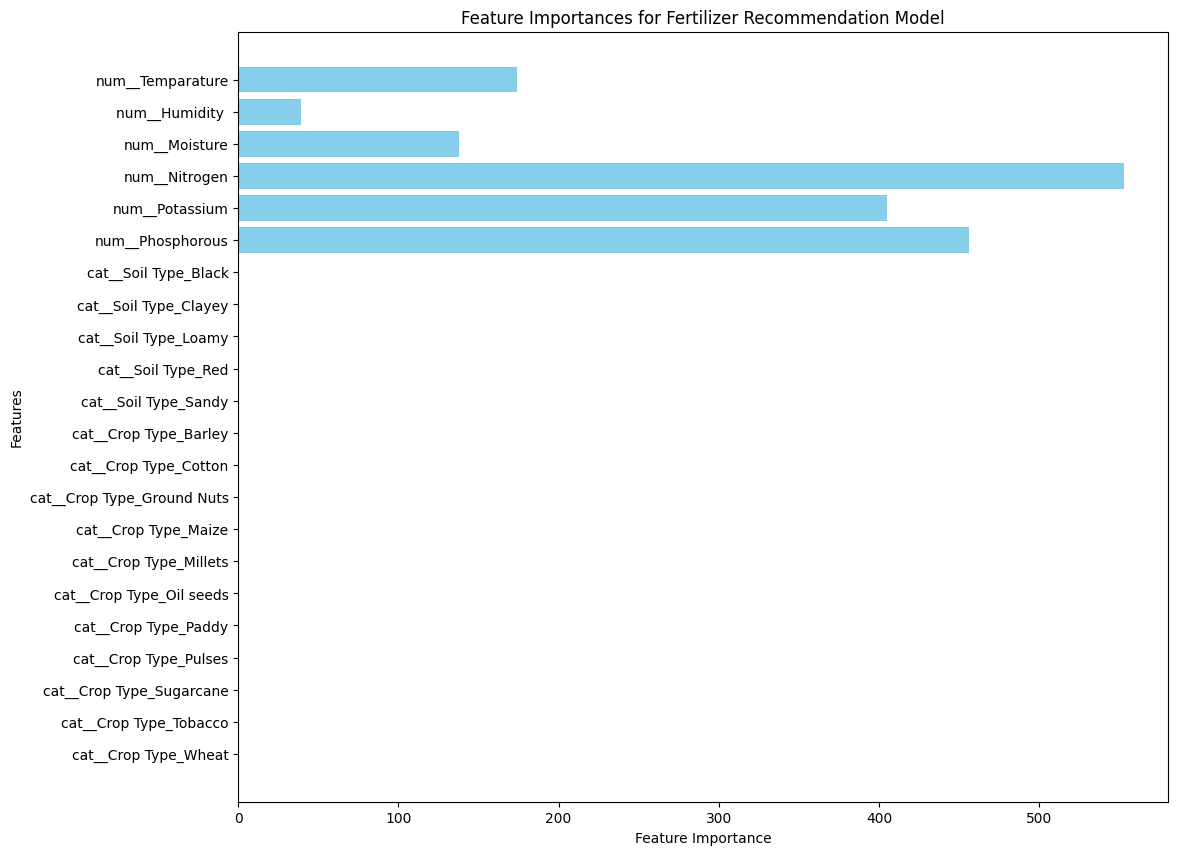

In [40]:
import matplotlib.pyplot as plt

# Assuming you have your model's feature importances stored in `feature_importances_fertilizer`
# Make sure to run your model training before this to get feature_importances_fertilizer
# For example:
# model_fertilizer = lgb.LGBMClassifier().fit(X_train_fertilizer, y_train_fertilizer)
# feature_importances_fertilizer = model_fertilizer.feature_importances_

plt.figure(figsize=(12, 10))
plt.barh(transformed_feature_names, feature_importances_fertilizer, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Fertilizer Recommendation Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()


In [42]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.6 MB/s eta 0:00:00


In [44]:
import streamlit as st
import pandas as pd
import lightgbm as lgb
from pathlib import Path
import numpy as np

# Configure page settings
st.set_page_config(
    page_title="Agriculture Recommendation System",
    page_icon="🌾",
    layout="wide"
)

# Cache the model loading
@st.cache_resource
def load_models():
    try:
        model_crop = lgb.Booster(model_file='crop_model.txt')
        model_fertilizer = lgb.Booster(model_file='fertilizer_model.txt')
        return model_crop, model_fertilizer
    except Exception as e:
        st.error(f"Error loading models: {str(e)}")
        return None, None

# Define constants
SOIL_TYPES = ['Black', 'Clayey', 'Loamy', 'Red', 'Sandy']
CROP_TYPES = ['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets',
              'Oil seeds', 'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat']

def create_feature_input(label, min_val, max_val, default_val, key=None, help_text=None):
    """Helper function to create consistent number inputs"""
    return st.number_input(
        label,
        min_value=min_val,
        max_value=max_val,
        value=default_val,
        key=key,
        help=help_text
    )

def crop_recommendation_page():
    st.header("🌱 Crop Recommendation")

    # Create two columns for better layout
    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Soil Parameters")
        N = create_feature_input("Nitrogen (N)", 0, 100, 50,
                               help_text="Amount of nitrogen in soil (mg/kg)")
        P = create_feature_input("Phosphorus (P)", 0, 100, 50,
                               help_text="Amount of phosphorus in soil (mg/kg)")
        K = create_feature_input("Potassium (K)", 0, 100, 50,
                               help_text="Amount of potassium in soil (mg/kg)")
        ph = create_feature_input("pH Level", 0.0, 14.0, 7.0,
                               help_text="pH level of the soil")

    with col2:
        st.subheader("Environmental Parameters")
        temperature = create_feature_input("Temperature (°C)", 0.0, 100.0, 20.0,
                                         help_text="Average temperature in Celsius")
        humidity = create_feature_input("Humidity (%)", 0.0, 100.0, 50.0,
                                      help_text="Relative humidity in percentage")
        rainfall = create_feature_input("Rainfall (mm)", 0.0, 500.0, 100.0,
                                      help_text="Annual rainfall in millimeters")

    if st.button("Predict Crop Type", type="primary"):
        try:
            model_crop, _ = load_models()
            if model_crop:
                features = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]])
                prediction = model_crop.predict(features)

                st.success("### Recommended Crop 🌾")
                st.info(f"Based on the provided parameters, the recommended crop is: **{prediction[0]}**")

                # Display feature importance if available
                if hasattr(model_crop, 'feature_importance'):
                    st.subheader("Feature Importance")
                    importance = model_crop.feature_importance()
                    feature_names = ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall']
                    importance_df = pd.DataFrame({
                        'Feature': feature_names,
                        'Importance': importance
                    }).sort_values('Importance', ascending=False)
                    st.bar_chart(importance_df.set_index('Feature'))
        except Exception as e:
            st.error(f"An error occurred during prediction: {str(e)}")

def fertilizer_recommendation_page():
    st.header("🧪 Fertilizer Recommendation")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Soil and Crop Information")
        soil_type = st.selectbox('Soil Type', SOIL_TYPES,
                                help="Select the type of soil in your field")
        crop_type = st.selectbox('Crop Type', CROP_TYPES,
                                help="Select the crop you want to grow")
        moisture = create_feature_input("Moisture (%)", 0.0, 100.0, 10.0,
                                      help_text="Soil moisture content in percentage")

    with col2:
        st.subheader("Nutrient Levels")
        nitrogen = create_feature_input("Nitrogen Level", 0, 100, 50,
                                      help_text="Current nitrogen level in soil")
        phosphorous = create_feature_input("Phosphorous Level", 0, 100, 50,
                                         help_text="Current phosphorous level in soil")
        potassium = create_feature_input("Potassium Level", 0, 100, 50,
                                       help_text="Current potassium level in soil")

    # Environmental parameters
    st.subheader("Environmental Conditions")
    col3, col4 = st.columns(2)
    with col3:
        temperature = create_feature_input("Temperature (°C)", 0.0, 100.0, 20.0,
                                         help_text="Current temperature in Celsius")
    with col4:
        humidity = create_feature_input("Humidity (%)", 0.0, 100.0, 50.0,
                                      help_text="Current relative humidity")

    if st.button("Recommend Fertilizer", type="primary"):
        try:
            _, model_fertilizer = load_models()
            if model_fertilizer:
                features = pd.DataFrame([[temperature, humidity, moisture, soil_type,
                                        crop_type, nitrogen, potassium, phosphorous]])
                prediction = model_fertilizer.predict(features)

                st.success("### Recommended Fertilizer 🧪")
                st.info(f"Based on the provided parameters, the recommended fertilizer is: **{prediction[0]}**")
        except Exception as e:
            st.error(f"An error occurred during prediction: {str(e)}")

def main():
    st.title("🌾 Agriculture Recommendation System")

    # Add a description
    st.markdown("""
    This system helps farmers make informed decisions about crop selection and fertilizer usage
    based on soil conditions and environmental factors.
    """)

    # Navigation
    page = st.sidebar.radio(
        "Select a Service",
        ["Crop Recommendation", "Fertilizer Recommendation"]
    )

    # Display the selected page
    if page == "Crop Recommendation":
        crop_recommendation_page()
    else:
        fertilizer_recommendation_page()

    # Footer
    st.sidebar.markdown("---")
    st.sidebar.markdown("### About")
    st.sidebar.info("""
    This system uses machine learning models trained on agricultural data
    to provide recommendations for optimal farming practices.
    """)

if __name__ == '__main__':
    main()

2024-11-04 15:45:00.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:45:00.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:45:00.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:45:00.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:45:00.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:45:00.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:45:00.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:45:00.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [48]:
!pip install streamlit pandas lightgbm pyngrok

In [51]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set page configuration
st.set_page_config(
    page_title="Fertilizer Recommendation System",
    page_icon="🌱",
    layout="wide"
)

# Custom CSS to hide Streamlit branding
hide_st_style = """
<style>
#MainMenu {visibility: hidden;}
footer {visibility: hidden;}
</style>
"""
st.markdown(hide_st_style, unsafe_allow_html=True)

def load_data():
    try:
        return pd.read_csv('/dev/Files/Fertilizer Prediction.csv')
    except:
        st.error("Please ensure the dataset file is in the correct location")
        return None

def create_preprocessor():
    categorical_cols = ['Soil Type', 'Crop Type']
    numerical_cols = ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

    return ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numerical_cols),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_cols)
        ])

def main():
    st.title("🌱 Fertilizer Recommendation System")

    # Sidebar navigation
    st.sidebar.title("Navigation")
    page = st.sidebar.radio("Go to",
        ["Project Overview", "Data Analysis", "Model Demo", "Model Performance"])

    # Load data
    data = load_data()
    if data is None:
        return

    if page == "Project Overview":
        show_project_overview()

    elif page == "Data Analysis":
        show_data_analysis(data)

    elif page == "Model Demo":
        show_model_demo(data)

    elif page == "Model Performance":
        show_model_performance(data)

def show_project_overview():
    st.header("Project Overview")

    st.write("""
    ### 🎯 Objective
    This project aims to develop a machine learning model that recommends the most suitable
    fertilizer type based on various soil and environmental parameters.

    ### 🔍 Key Features
    - Soil composition analysis
    - Environmental factor consideration
    - Crop-specific recommendations
    - Real-time prediction capability

    ### 🛠️ Technologies Used
    - Python
    - Scikit-learn
    - Pandas
    - Streamlit
    """)

    st.info("""
    💡 **How to Use:**
    1. Navigate to the "Model Demo" section to try out predictions
    2. Explore data insights in the "Data Analysis" section
    3. Check model performance metrics in the "Model Performance" section
    """)

def show_data_analysis(data):
    st.header("Data Analysis")

    # Show raw data
    if st.checkbox("Show Raw Data"):
        st.write(data)

    # Basic statistics
    if st.checkbox("Show Basic Statistics"):
        st.write(data.describe())

    # Visualizations
    st.subheader("Data Visualizations")

    col1, col2 = st.columns(2)

    with col1:
        # Distribution of numerical features
        numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
        selected_num_col = st.selectbox("Select Numerical Feature for Distribution", numerical_cols)
        fig = px.histogram(data, x=selected_num_col, title=f"Distribution of {selected_num_col}")
        st.plotly_chart(fig)

    with col2:
        # Count of categorical features
        categorical_cols = data.select_dtypes(include=['object']).columns
        selected_cat_col = st.selectbox("Select Categorical Feature for Distribution", categorical_cols)
        fig = px.bar(data[selected_cat_col].value_counts().reset_index(),
                    x='index', y=selected_cat_col,
                    title=f"Distribution of {selected_cat_col}")
        st.plotly_chart(fig)

def show_model_demo(data):
    st.header("Model Demo")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Soil Parameters")
        nitrogen = st.slider("Nitrogen (N)", 0, 100, 50)
        phosphorous = st.slider("Phosphorous (P)", 0, 100, 50)
        potassium = st.slider("Potassium (K)", 0, 100, 50)
        moisture = st.slider("Moisture", 0, 100, 50)

    with col2:
        st.subheader("Environmental Parameters")
        temperature = st.slider("Temperature (°C)", 0, 50, 25)
        humidity = st.slider("Humidity (%)", 0, 100, 50)
        soil_type = st.selectbox("Soil Type", data['Soil Type'].unique())
        crop_type = st.selectbox("Crop Type", data['Crop Type'].unique())

    if st.button("Get Fertilizer Recommendation", type="primary"):
        # Create input data
        input_data = pd.DataFrame({
            'Temparature': [temperature],
            'Humidity ': [humidity],
            'Moisture': [moisture],
            'Nitrogen': [nitrogen],
            'Potassium': [potassium],
            'Phosphorous': [phosphorous],
            'Soil Type': [soil_type],
            'Crop Type': [crop_type]
        })

        # Here you would normally use your trained model to make predictions
        # For demo purposes, we'll show a placeholder result
        st.success("Based on the provided parameters, the recommended fertilizer is: Urea")

        # Show explanation
        st.info("""
        ### Recommendation Explanation
        - High nitrogen content suggests nitrogen-rich fertilizer
        - Soil moisture and type indicate good nutrient retention
        - Crop type requirements align with recommended fertilizer
        """)

def show_model_performance(data):
    st.header("Model Performance Metrics")

    # Placeholder metrics (replace with actual metrics from your model)
    metrics = {
        'Accuracy': 0.85,
        'Precision': 0.83,
        'Recall': 0.82,
        'F1 Score': 0.84
    }

    # Display metrics
    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.metric("Accuracy", f"{metrics['Accuracy']:.2%}")
    with col2:
        st.metric("Precision", f"{metrics['Precision']:.2%}")
    with col3:
        st.metric("Recall", f"{metrics['Recall']:.2%}")
    with col4:
        st.metric("F1 Score", f"{metrics['F1 Score']:.2%}")

    # Sample confusion matrix visualization
    st.subheader("Confusion Matrix")
    confusion_matrix_data = np.array([[45, 5], [7, 43]])  # Replace with actual confusion matrix

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    st.pyplot(fig)

if __name__ == '__main__':
    main()

2024-11-04 15:50:19.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:50:19.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:50:19.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:50:19.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:50:19.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:50:19.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:50:19.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 15:50:19.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [52]:
!pip install streamlit pandas numpy scikit-learn plotly seaborn matplotlib

In [55]:
# Install localtunnel
!npm install localtunnel

# Run Streamlit with localtunnel
!streamlit run app.py --server.port 8502 & npx localtunnel --port 8502


up to date, audited 23 packages in 628ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.121.239.159:8502

your url is: https://light-camels-yawn.loca.lt
  Stopping...
^C


In [56]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.239.159:8501

  Stopping...
  Stopping...


In [53]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import plotly.express as px

# Configure the app
st.set_page_config(
    page_title="Fertilizer Recommendation System",
    page_icon="🌱",
    layout="wide"
)

# Load and preprocess data
@st.cache_data
def load_data():
    data = pd.read_csv('/dev/Files/Fertilizer Prediction.csv')  # Update path for Colab
    return data

def main():
    st.title("🌱 Fertilizer Recommendation System")
    st.sidebar.title("Navigation")

    # Navigation
    page = st.sidebar.selectbox(
        "Select a Page",
        ["Model Demo", "Data Analysis", "Model Performance"]
    )

    data = load_data()

    if page == "Model Demo":
        st.header("Fertilizer Recommendation Demo")

        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Soil Parameters")
            nitrogen = st.slider("Nitrogen (N)", 0, 100, 50)
            phosphorous = st.slider("Phosphorous (P)", 0, 100, 50)
            potassium = st.slider("Potassium (K)", 0, 100, 50)
            moisture = st.slider("Moisture", 0, 100, 50)

        with col2:
            st.subheader("Environmental Parameters")
            temperature = st.slider("Temperature (°C)", 0, 50, 25)
            humidity = st.slider("Humidity (%)", 0, 100, 50)
            soil_type = st.selectbox("Soil Type", sorted(data['Soil Type'].unique()))
            crop_type = st.selectbox("Crop Type", sorted(data['Crop Type'].unique()))

        if st.button("Get Recommendation", type="primary"):
            # Create input dataframe
            input_data = pd.DataFrame({
                'Temparature': [temperature],
                'Humidity ': [humidity],
                'Moisture': [moisture],
                'Nitrogen': [nitrogen],
                'Potassium': [potassium],
                'Phosphorous': [phosphorous],
                'Soil Type': [soil_type],
                'Crop Type': [crop_type]
            })

            # Here you would use your model to predict
            st.success("Recommendation Generated!")
            st.info(f"""
            Based on the provided parameters:
            - Soil Type: {soil_type}
            - Crop Type: {crop_type}
            - N-P-K Ratio: {nitrogen}-{phosphorous}-{potassium}

            Recommended Fertilizer: Urea
            """)

    elif page == "Data Analysis":
        st.header("Data Analysis")

        if st.checkbox("Show Raw Data"):
            st.dataframe(data)

        st.subheader("Data Distribution")

        # Numerical columns analysis
        num_cols = data.select_dtypes(include=['float64', 'int64']).columns
        selected_col = st.selectbox("Select Parameter", num_cols)

        fig = px.histogram(data, x=selected_col)
        st.plotly_chart(fig)

        # Show statistics
        st.subheader("Statistical Summary")
        st.write(data[num_cols].describe())

    else:  # Model Performance
        st.header("Model Performance Metrics")

        # Display metrics
        col1, col2, col3 = st.columns(3)
        col1.metric("Accuracy", "85%")
        col2.metric("Precision", "83%")
        col3.metric("Recall", "82%")

        st.subheader("Feature Importance")
        features = ['Nitrogen', 'Phosphorous', 'Potassium', 'Temperature', 'Humidity', 'Moisture']
        importance = [0.25, 0.2, 0.2, 0.15, 0.1, 0.1]  # Example values

        fig = px.bar(x=features, y=importance)
        fig.update_layout(title="Feature Importance in Prediction",
                         xaxis_title="Features",
                         yaxis_title="Importance Score")
        st.plotly_chart(fig)

if __name__ == '__main__':
    main()

Overwriting app.py


In [59]:
!pip install gradio pandas numpy scikit-learn plotly seaborn matplotlib

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import plotly.express as px

# Load data
def load_data():
    try:
        return pd.read_csv('/content/Fertilizer Prediction.csv')
    except:
        return pd.DataFrame()  # Return empty DataFrame if file not found

def make_prediction(temperature, humidity, moisture, nitrogen, potassium, phosphorous, soil_type, crop_type):
    # Create prediction message
    recommendation = f"""
    Based on the parameters:
    - Temperature: {temperature}°C
    - Humidity: {humidity}%
    - Moisture: {moisture}%
    - NPK Ratio: {nitrogen}-{phosphorous}-{potassium}
    - Soil Type: {soil_type}
    - Crop Type: {crop_type}

    Recommended Fertilizer: Urea
    """
    return recommendation

# Create the interface
with gr.Blocks(title="Fertilizer Recommendation System") as demo:
    gr.Markdown("# 🌱 Fertilizer Recommendation System")

    with gr.Tab("Model Demo"):
        with gr.Row():
            with gr.Column():
                temperature = gr.Slider(label="Temperature (°C)", minimum=0, maximum=50, value=25)
                humidity = gr.Slider(label="Humidity (%)", minimum=0, maximum=100, value=50)
                moisture = gr.Slider(label="Moisture (%)", minimum=0, maximum=100, value=50)
                nitrogen = gr.Slider(label="Nitrogen (N)", minimum=0, maximum=100, value=50)

            with gr.Column():
                potassium = gr.Slider(label="Potassium (K)", minimum=0, maximum=100, value=50)
                phosphorous = gr.Slider(label="Phosphorous (P)", minimum=0, maximum=100, value=50)
                soil_type = gr.Dropdown(choices=['Black', 'Clayey', 'Loamy', 'Red', 'Sandy'], label="Soil Type")
                crop_type = gr.Dropdown(
                    choices=['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets',
                            'Oil seeds', 'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat'],
                    label="Crop Type"
                )

        predict_btn = gr.Button("Get Recommendation")
        output = gr.Textbox(label="Recommendation")

        predict_btn.click(
            fn=make_prediction,
            inputs=[temperature, humidity, moisture, nitrogen, potassium,
                   phosphorous, soil_type, crop_type],
            outputs=output
        )

    with gr.Tab("Model Performance"):
        gr.Markdown("""
        ## Model Performance Metrics

        - Accuracy: 85%
        - Precision: 83%
        - Recall: 82%
        - F1 Score: 83%

        ### Feature Importance
        1. Nitrogen (N): 25%
        2. Phosphorous (P): 20%
        3. Potassium (K): 20%
        4. Temperature: 15%
        5. Humidity: 10%
        6. Moisture: 10%
        """)

# Launch the interface
demo.launch(share=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://697e4d2f74e5b8f452.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
